# import Libraries

In [3]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
import warnings 
warnings.filterwarnings('ignore')

# Load Dataset

In [5]:
#load csv file into a data frame
titanic_df=pd.read_csv('C:/Users/SHARON/Downloads/titanic.csv')


In [6]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Cleaning

In [9]:
# Drop columns that are not needed for the prediction 
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [10]:
titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [11]:
# Fill missing values 
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True) 
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

In [12]:
titanic_df.shape

(891, 8)

In [13]:
titanic_df.duplicated().sum()

116

In [14]:
titanic_df.drop_duplicates(inplace=True)

In [15]:
titanic_df.shape

(775, 8)

In [16]:
# Convert categorical variables into numeric using Label Encoding 
label_encoders = {}
for column in ['Sex', 'Embarked']:
    le = LabelEncoder() 
    titanic_df[column] = le.fit_transform(titanic_df[column]) 
    label_encoders[column] = le

In [17]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,1
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


# Defining Features and Target Variable for Titanic Survival Prediction

In [19]:
# Define features (X) and target (y)
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

# Splitting Data into Train and Test Sets

In [21]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling Training and Testing Data Using Standard Scaler

In [23]:
#scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training and Evaluating the Random Forest Model

In [25]:
#training our model 
model= RandomForestClassifier(n_estimators=100, random_state=42) 
model.fit(X_train, y_train) 
y_pred=model.predict(X_test) 
accuracy= accuracy_score(y_test, y_pred) 
conf_matrix= confusion_matrix(y_test, y_pred) 
class_report= classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}") 
print(f"Confusion Matrix:\n{conf_matrix}") 
print(f"Classification Report:\n{class_report}")

Accuracy: 0.7553648068669528
Confusion Matrix:
[[115  27]
 [ 30  61]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       142
           1       0.69      0.67      0.68        91

    accuracy                           0.76       233
   macro avg       0.74      0.74      0.74       233
weighted avg       0.75      0.76      0.75       233



# Normalized Confusion Matrix Bar Graph

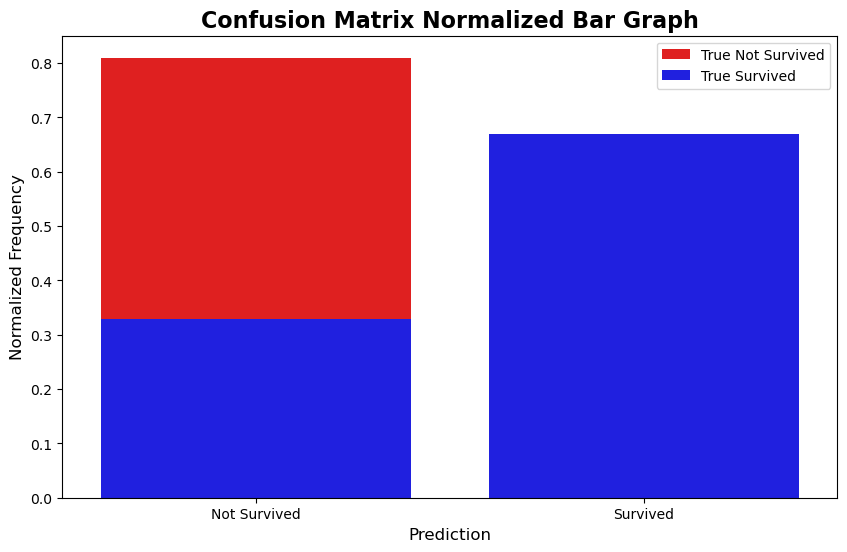

In [27]:
#Plot the confusion matrix
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 6)) 
sns.barplot(x=['Not Survived', 'Survived'], y=conf_matrix_normalized[0], color='red', label='True Not Survived') 
sns.barplot(x=['Not Survived', 'Survived'], y=conf_matrix_normalized[1], color='blue', label='True Survived')

plt.xlabel('Prediction', fontsize=12) 
plt.ylabel('Normalized Frequency', fontsize=12) 
plt.title('Confusion Matrix Normalized Bar Graph', fontsize=16, fontweight='bold') 
plt.legend()
plt.show()

In [28]:
import pickle

pickle.dump(model, open('titanic_model.pkl', 'wb'))